In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv(r"C:\Users\ashiv\OneDrive\Documents\Advance Buisness Analytics\Fedida_Muthu_Tiwari_DB3.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [4]:
# Replacing the numeric values that are categories for better analysis

data["Marital_Status"] = data["Marital_Status"].apply(lambda x: "Unmarried" if x == 0 else "Married")
data["Occupation"] = data["Occupation"].astype("object")
data["Product_Category"] = data["Product_Category"].astype("object")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [9]:
data.describe(include= object).T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,Unmarried,324731
Product_Category,550068,20,5,150933


## Initial Analysis:

1.	The dataset contains 3631 unique products spread across 20 categories. The top-selling product, P00265242, was purchased a total of 1880 times. The most prevalent product category is category number 5.

2.	Customers in the dataset are classified based on various demographics: gender, age group, marital status, city type, duration of stay, and occupation level.

3.	Regarding gender and marital status, the dataset includes two genders, with males being the dominant demographic, accounting for 414259 purchases. Unmarried individuals constitute most of Walmart's customer base, with 324731 purchases.

4.	Customers are grouped into seven age categories and twenty-one different occupations. The largest segment of customers falls within the 26-35 age group and occupies level 4 occupations.

5.	City types are segmented into three categories, with most purchases originating from Type B cities, totaling 231173 transactions.

6.	Customers are further classified into five groups based on the duration of their stay in a particular city type. The most common scenario is customers staying for one year in their current city type

# Outlier Detection and Treatment

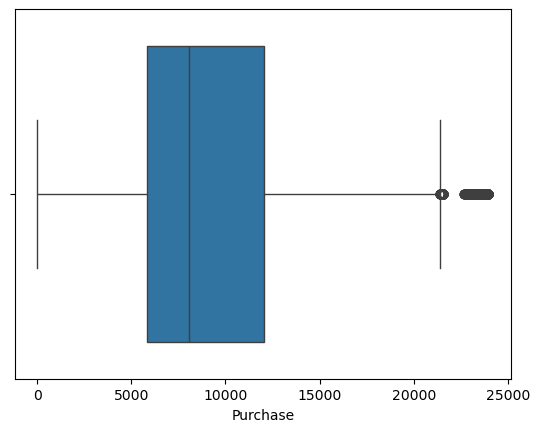

<Figure size 2000x1500 with 0 Axes>

In [10]:
fig, ax = plt.subplots()
fig = plt.figure(figsize=(20,15))
plt.suptitle("Purchase amount Outliers")
fig = sns.boxplot(data = data,x="Purchase",ax=ax)
plt.show()

In [13]:
filtered_data = data[data['Purchase'] > 22000]
filtered_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,Unmarried,10,23603
375,1000062,P00119342,F,36-45,3,A,1,Unmarried,10,23792
652,1000126,P00087042,M,18-25,9,B,1,Unmarried,10,23233
736,1000139,P00159542,F,26-35,20,C,2,Unmarried,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,Unmarried,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,Unmarried,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,Unmarried,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,Married,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,Married,10,23663


<Axes: xlabel='Product_Category', ylabel='Purchase'>

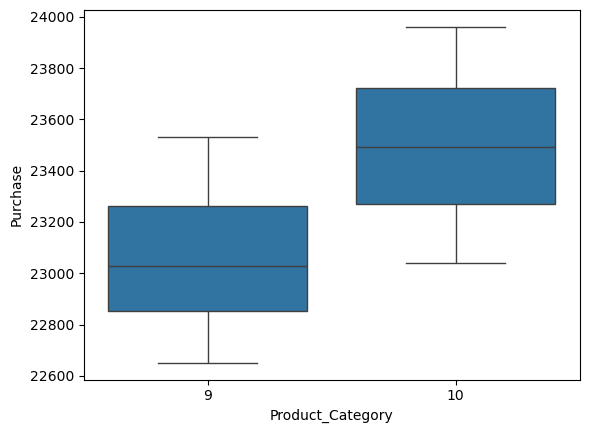

In [16]:
sns.boxplot(x='Product_Category', y='Purchase', data=filtered_data)


<Axes: xlabel='Product_Category', ylabel='Purchase'>

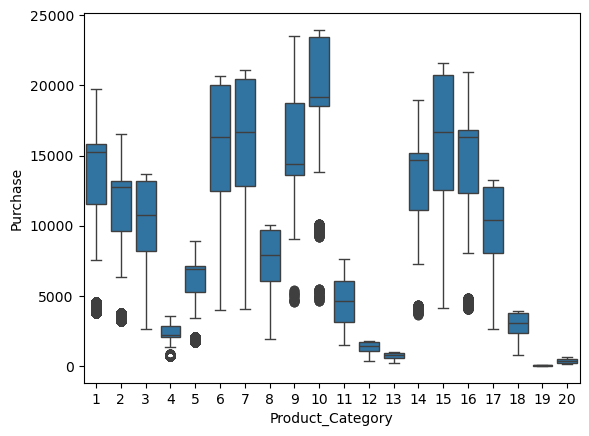

In [18]:
sns.boxplot(x='Product_Category', y='Purchase', data=data)

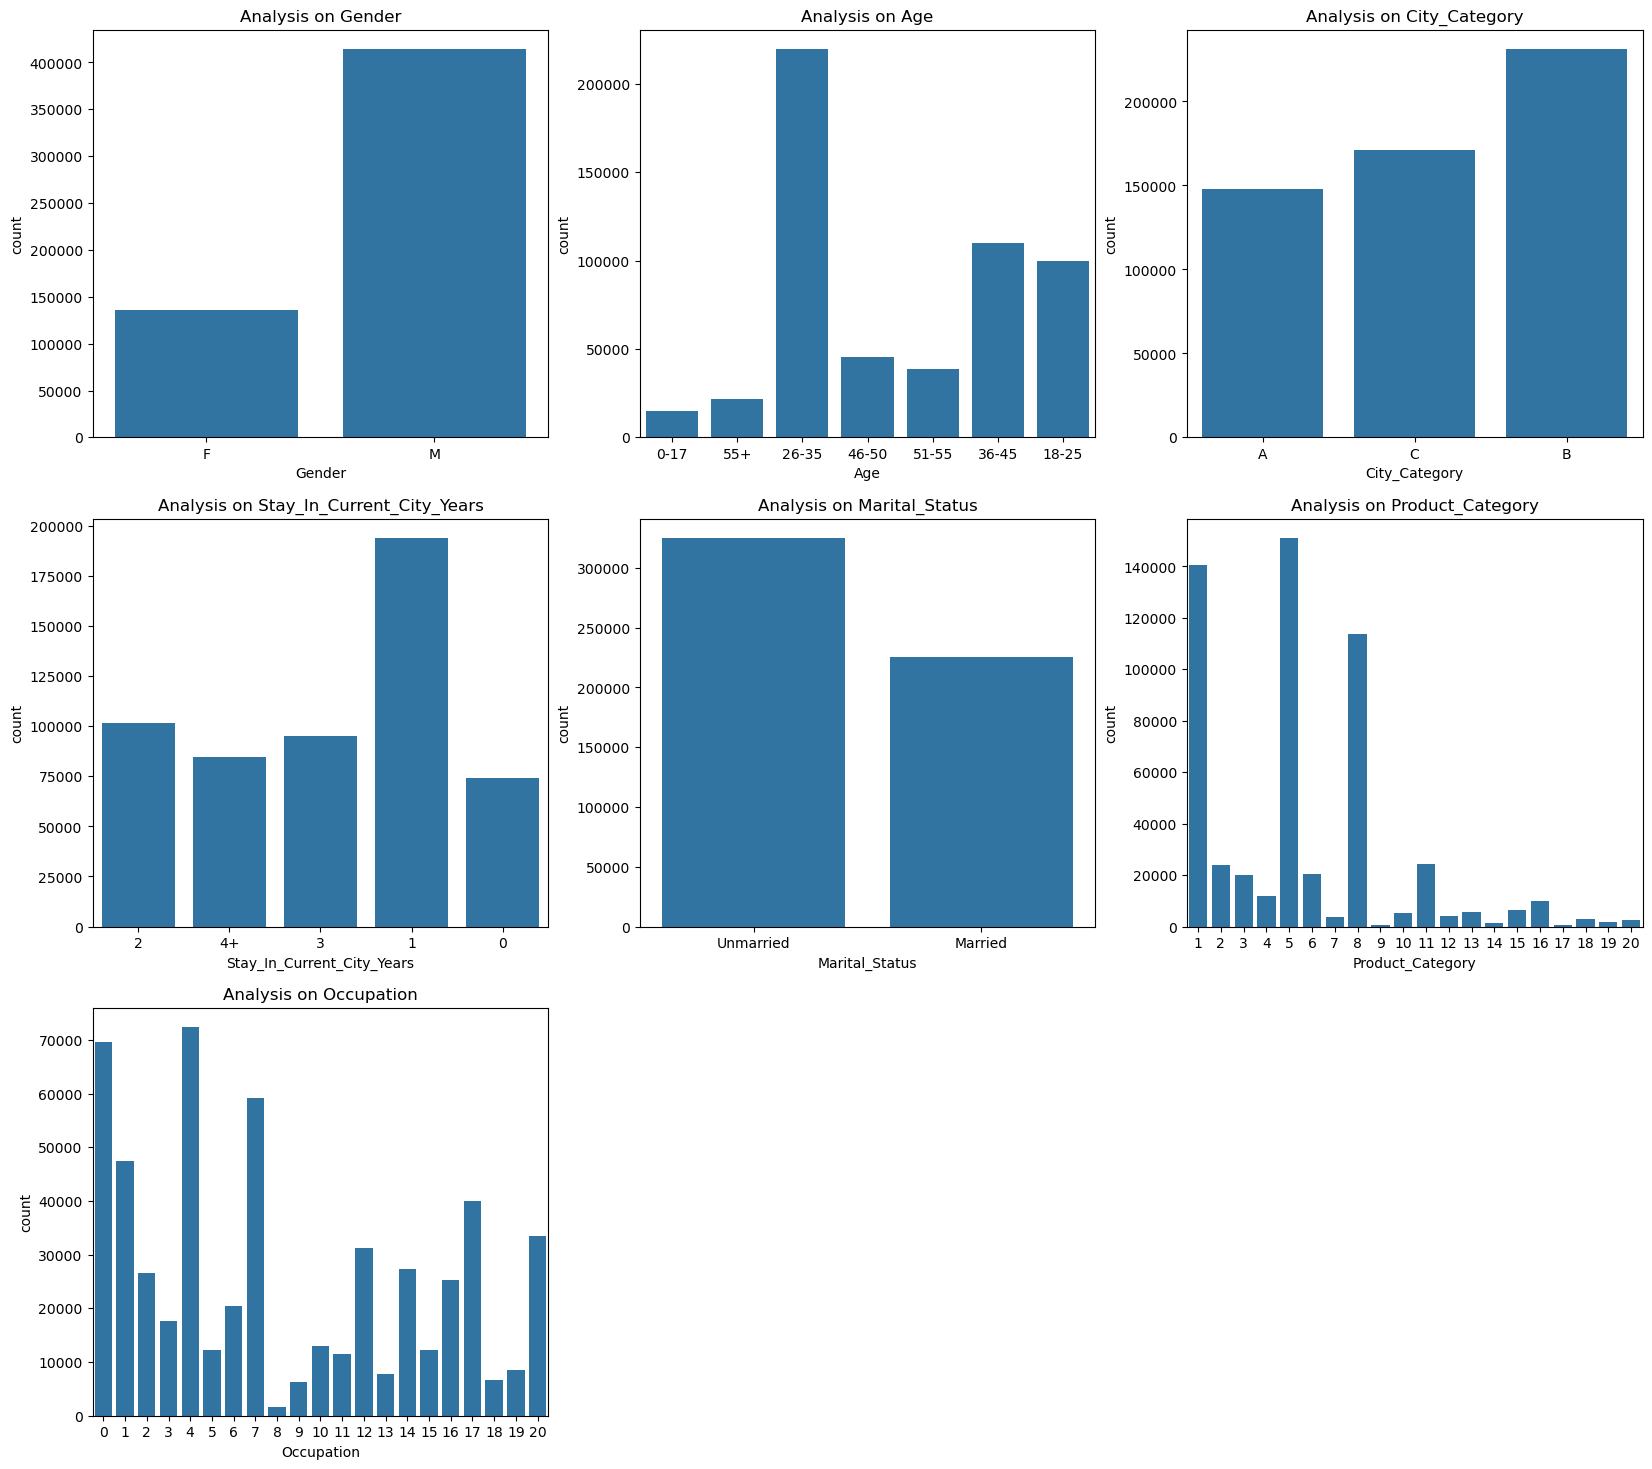

In [22]:
plt.figure(figsize = (20,18))
features = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status',"Product_Category","Occupation"]
for i in range(len(features)):                              
     plt.subplot(3, 3, i+1)
     sns.countplot(x = data[features[i]])
     plt.title('Analysis on {}'.format(features[i]))

plt.show()

## Analysis and Explanation

1. Significantly more puchases were been made by males than by females.

2. Majority of the customers belongs to the age group of 26-35 followed by 36-45, while 0-17 age group comprises the lowest numbers.

3. People in cities of type B made maximum number of purchases.

4. People who have stayed in their city for a year have made the maximum number of purchases.

5. Majority of purchases were made by Unmarried people.

6. Products of category 1, 5 and 8 are the most popular.

7. Consumers of occupation level 0,4 and 7 made more purchases, while customers of level 8 & 19 made the least.

# Feature Engineering 

In [6]:
data["Marital_Status"] = data["Marital_Status"].apply(lambda x: 0 if x == "Unmarried" else 1)
data["Occupation"] = data["Occupation"].astype(int)
data["Product_Category"] = data["Product_Category"].astype(int)
data["Gender"] = data["Gender"].apply(lambda x: 0 if x == "Male" else 1)

In [7]:
city_category_mapping = {'A': 0, 'B': 1, 'C': 2}

data['City_Category'] = data['City_Category'].map(city_category_mapping)

In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0-17,10,0,2,0,3,8370
1,1000001,P00248942,1,0-17,10,0,2,0,1,15200
2,1000001,P00087842,1,0-17,10,0,2,0,12,1422
3,1000001,P00085442,1,0-17,10,0,2,0,12,1057
4,1000002,P00285442,1,55+,16,2,4+,0,8,7969


In [9]:
unique = data['Stay_In_Current_City_Years'].unique()
unique

array(['2', '4+', '3', '1', '0'], dtype=object)

In [10]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', 4)

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

### IMPORTANT --- The values 4+ in (Stay_In_Current_City_Years) has been replaced by only 4 that means if we see 4 in (Stay_In_Current_City_Years) it means that customers are staying more than 4 years

### changing the Age column to integer as it is impportant feature 

In [11]:
unique_ages = data['Age'].unique()
unique_ages

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
data['Age'] = data['Age'].str.replace('+', '')

In [13]:
unique_ages = data['Age'].unique()
unique_ages

array(['0-17', '55', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
calculate_median_age = lambda x: np.median([int(i) for i in x.split('-')])

data['median_age'] = data['Age'].apply(calculate_median_age)

In [77]:
def calculate_representative_age(age_range):
    if '-' in age_range:
        lower_bound, upper_bound = map(int, age_range.split('-'))
        return round((lower_bound + upper_bound) / 2)
    else:
        return int(age_range)

data['representative_age'] = data['Age'].apply(calculate_representative_age)

In [79]:
unique_ages = data['age_numeric'].unique()
unique_ages

array([ 8.5, 60. , 30.5, 48. , 53. , 40.5, 21.5])

In [15]:
unique_ages = data['median_age'].unique()
unique_ages

array([ 8.5, 55. , 30.5, 48. , 53. , 40.5, 21.5])

In [82]:
unique_ages = data['representative_age'].unique()
unique_ages

array([ 8, 55, 30, 48, 53, 40, 22], dtype=int64)

In [16]:
data.drop(columns=['Age'], inplace=True)

In [17]:
data.drop(columns=['User_ID','Product_ID'], inplace=True)

In [18]:
data.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,median_age
0,1,10,0,2,0,3,8370,8.5
1,1,10,0,2,0,1,15200,8.5
2,1,10,0,2,0,12,1422,8.5
3,1,10,0,2,0,12,1057,8.5
4,1,16,2,4,0,8,7969,55.0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Occupation                  550068 non-null  int32  
 2   City_Category               550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category            550068 non-null  int32  
 6   Purchase                    550068 non-null  int64  
 7   median_age                  550068 non-null  float64
dtypes: float64(1), int32(3), int64(4)
memory usage: 27.3 MB


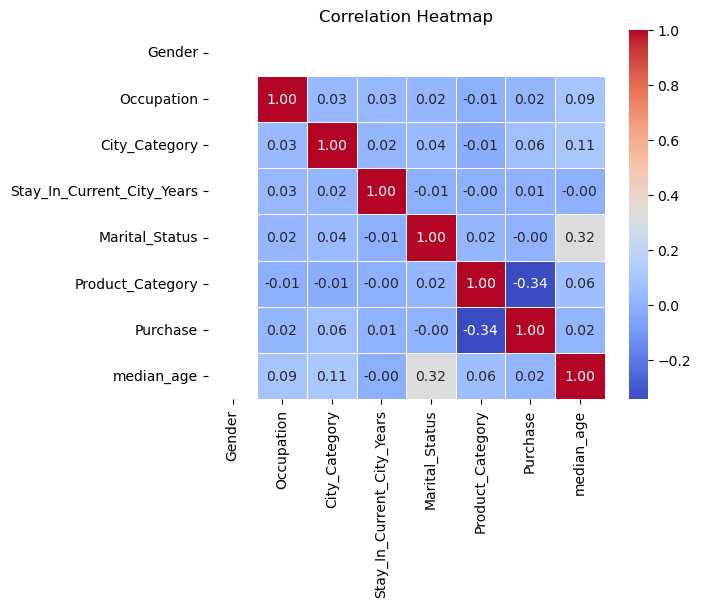

In [21]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering Analysis Explanation :
1. Converting the data types back to integer from object type
2. The column (Stay_In_Current_City_Years) has been replaced by only 4 that means if we see 4 in (Stay_In_Current_City_Years) it means that customers are staying more than 4 years
3. One of the most challanging task was to convert the age into integer for which I took the medain of the current age column and stored in a new column since the Age is a important feature for my model I want it in my dataframe.

# Model Building 

In [105]:
scaler = StandardScaler()
data[['Purchase', 'median_age']] = scaler.fit_transform(data[['Purchase', 'median_age']])

In [106]:
X = data.drop('Purchase', axis=1)
y = data['Purchase']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [109]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [110]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 9s 818us/step - loss: 0.7271
Epoch 2/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 780us/step - loss: 0.5665
Epoch 3/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 786us/step - loss: 0.4940
Epoch 4/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 787us/step - loss: 0.4023
Epoch 5/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 792us/step - loss: 0.3796
Epoch 6/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 787us/step - loss: 0.3745
Epoch 7/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 778us/step - loss: 0.3698
Epoch 8/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 789us/step - loss: 0.3675
Epoch 9/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 6s 798us/step - loss: 0.3656
Epoch 10/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 792us/step - loss: 0.3673
Epoch 11/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 784us/step - loss: 0.3644
Epoch 12/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 773us/step - loss: 0.3661
Epoch 13/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 5s 775us/step - loss: 0.3659
Epoch 14/50
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 6s 802us/step - loss: 0.3629
E

In [116]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

3438/3438 ━━━━━━━━━━━━━━━━━━━━ 2s 620us/step
Mean Absolute Error: 0.45186897450125524
Mean Squared Error: 0.3636045858953551
Root Mean Squared Error: 0.6029963398689541
R-squared: 0.6348765207815075


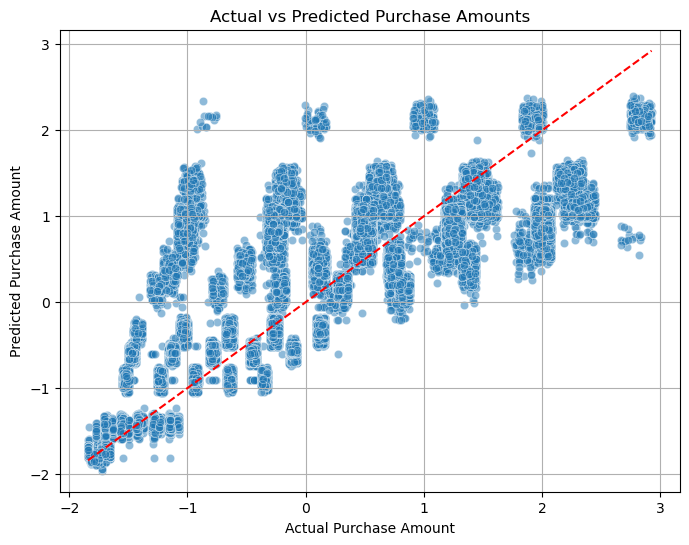

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs Predicted Purchase Amounts')
plt.grid(True)
plt.show()

In [127]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3576 - val_loss: 0.3543
Epoch 2/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5s 960us/step - loss: 0.3597 - val_loss: 0.3570
Epoch 3/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5s 906us/step - loss: 0.3602 - val_loss: 0.3557
Epoch 4/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5s 943us/step - loss: 0.3602 - val_loss: 0.3534
Epoch 5/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3596 - val_loss: 0.3566
Epoch 6/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5s 962us/step - loss: 0.3585 - val_loss: 0.3548
Epoch 7/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5s 985us/step - loss: 0.3581 - val_loss: 0.3554
Epoch 8/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5s 917us/step - loss: 0.3571 - val_loss: 0.3549
Epoch 9/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5s 933us/step - loss: 0.3574 - val_loss: 0.3565
Epoch 10/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5s 907us/step - loss: 0.3573 - val_loss: 0.3579
Epoch 11/50
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 5s 936us/step - loss: 0.3581 - val_loss: 0.3546
Epoch 12/50


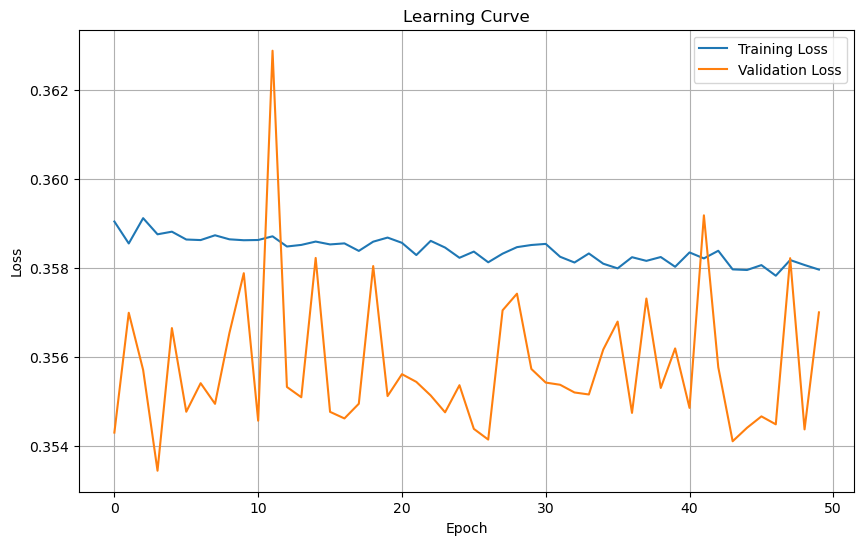

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

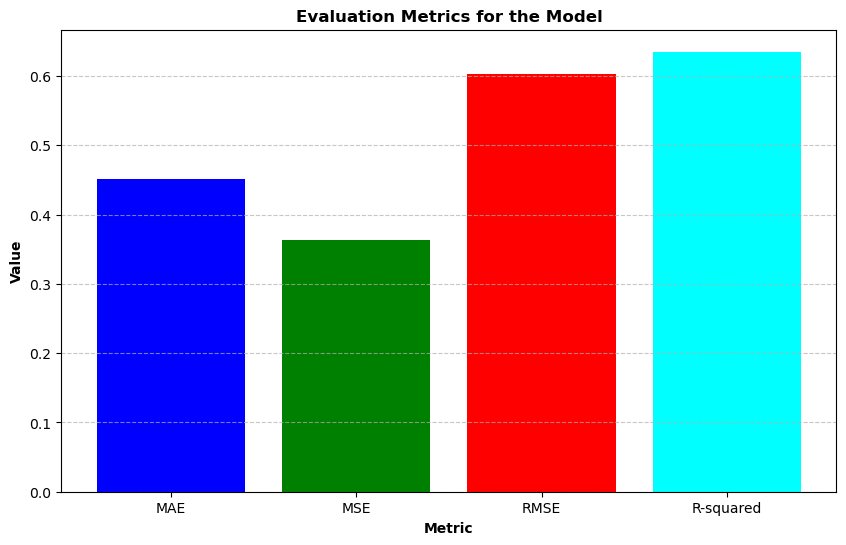

In [129]:
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R-squared': r2
}

metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Metric', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.title('Evaluation Metrics for the Model', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()